In [ ]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# What's Hot in Online Shopping: A Data-Driven Adventure

**We'll uncover:**

* The most popular products: What's flying off the digital shelves?
* When people shop: Are there certain times or months when sales go crazy?
* Where shoppers come from: Which countries are the biggest online spenders?
* Who the most loyal customers are: Who keeps coming back for more?

In [1]:
df=pd.read_csv('online_retail.csv')
df

NameError: name 'pd' is not defined

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [5]:
df.describe()

index       Quantity      UnitPrice     CustomerID
count  541909.00000  541909.000000  541909.000000  406829.000000
mean   270954.00000       9.552250       4.611114   15287.690570
std    156435.79785     218.081158      96.759853    1713.600303
min         0.00000  -80995.000000  -11062.060000   12346.000000
25%    135477.00000       1.000000       1.250000   13953.000000
50%    270954.00000       3.000000       2.080000   15152.000000
75%    406431.00000      10.000000       4.130000   16791.000000
max    541908.00000   80995.000000   38970.000000   18287.000000

In [6]:
df.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### There are lots of missing values in Customer ID 

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['index'],inplace=True)

In [9]:
len(df['Description'].unique())

4224

#### There are 4224 unique products in our data

In [10]:
pip install plotly

                                              0.0/15.7 MB ? eta -:--:--
                                              0.2/15.7 MB 6.9 MB/s eta 0:00:03
     ---                                      1.3/15.7 MB 16.9 MB/s eta 0:00:01
     --------                                 3.2/15.7 MB 25.8 MB/s eta 0:00:01
     -----------                              4.6/15.7 MB 26.9 MB/s eta 0:00:01
     --------------                           5.8/15.7 MB 26.4 MB/s eta 0:00:01
     -----------------                        7.0/15.7 MB 24.8 MB/s eta 0:00:01
     --------------------                     8.2/15.7 MB 24.9 MB/s eta 0:00:01
     ------------------------                 9.5/15.7 MB 25.4 MB/s eta 0:00:01
     --------------------------              10.7/15.7 MB 27.3 MB/s eta 0:00:01
     ------------------------------          12.1/15.7 MB 27.3 MB/s eta 0:00:01
     --------------------------------        13.0/15.7 MB 27.3 MB/s eta 0:00:01
     -----------------------------------     14.3


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Most buyed Product Analysis

In [13]:
Most_buyed_product=df.groupby(by='Description').agg({'Quantity':'sum'}).sort_values(by='Quantity',ascending=False).reset_index().head(15)
Most_buyed_product

Description  Quantity
0    WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
1              JUMBO BAG RED RETROSPOT     47363
2        ASSORTED COLOUR BIRD ORNAMENT     36381
3                       POPCORN HOLDER     36334
4      PACK OF 72 RETROSPOT CAKE CASES     36039
5   WHITE HANGING HEART T-LIGHT HOLDER     35317
6                   RABBIT NIGHT LIGHT     30680
7              MINI PAINT SET VINTAGE      26437
8           PACK OF 12 LONDON TISSUES      26315
9   PACK OF 60 PINK PAISLEY CAKE CASES     24753
10     VICTORIAN GLASS HANGING T-LIGHT     23854
11           ASSORTED COLOURS SILK FAN     23082
12                 BROCADE RING PURSE      23053
13              RED  HARMONICA IN BOX      21866
14             JUMBO BAG PINK POLKADOT     21009

In [56]:
import plotly.express as px

In [59]:
fig = px.bar(Most_buyed_product, x='Quantity', y='Description', title='Top 15 Most Bought Products')
fig.show(renderer="notebook")

## Top Products Countrywise

In [15]:
top_products_countrywise=df.groupby(['Country','Description']).agg({'Quantity':'sum'}).reset_index()
top_products_countrywise

Country                    Description  Quantity
0        Australia              DOLLY GIRL BEAKER       200
1        Australia    I LOVE LONDON MINI BACKPACK         4
2        Australia         10 COLOUR SPACEBOY PEN        48
3        Australia  12 PENCIL SMALL TUBE WOODLAND       384
4        Australia      12 PENCILS TALL TUBE POSY       252
...            ...                            ...       ...
20171  Unspecified           WRAP POPPIES  DESIGN        25
20172  Unspecified          WRAP SUKI AND FRIENDS        25
20173  Unspecified    WRAP VINTAGE PETALS  DESIGN        25
20174  Unspecified               WRAP WEDDING DAY        25
20175  Unspecified    ZINC METAL HEART DECORATION         2

[20176 rows x 3 columns]

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Collecting wordcloud
                                              0.0/300.2 kB ? eta -:--:--
     --------------                         112.6/300.2 kB 3.2 MB/s eta 0:00:01
     -------------------------              204.8/300.2 kB 2.5 MB/s eta 0:00:01
     --------------------------------       256.0/300.2 kB 2.0 MB/s eta 0:00:01
     -------------------------------------  297.0/300.2 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
countries=list(df['Country'].unique())
countries

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Malta',
 'RSA']

In [21]:
from wordcloud import WordCloud

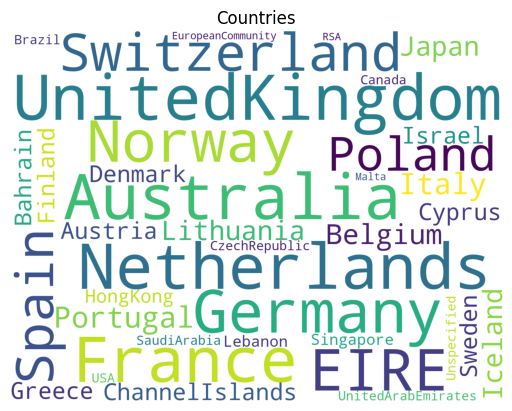

In [22]:
text=[]
for i in countries:
    i=i.replace(' ','')
    text.append(i)
text=','.join(text)
wordcloud=WordCloud(width=1600,height=1200 , background_color='white').generate(text)
plt.title('Countries')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

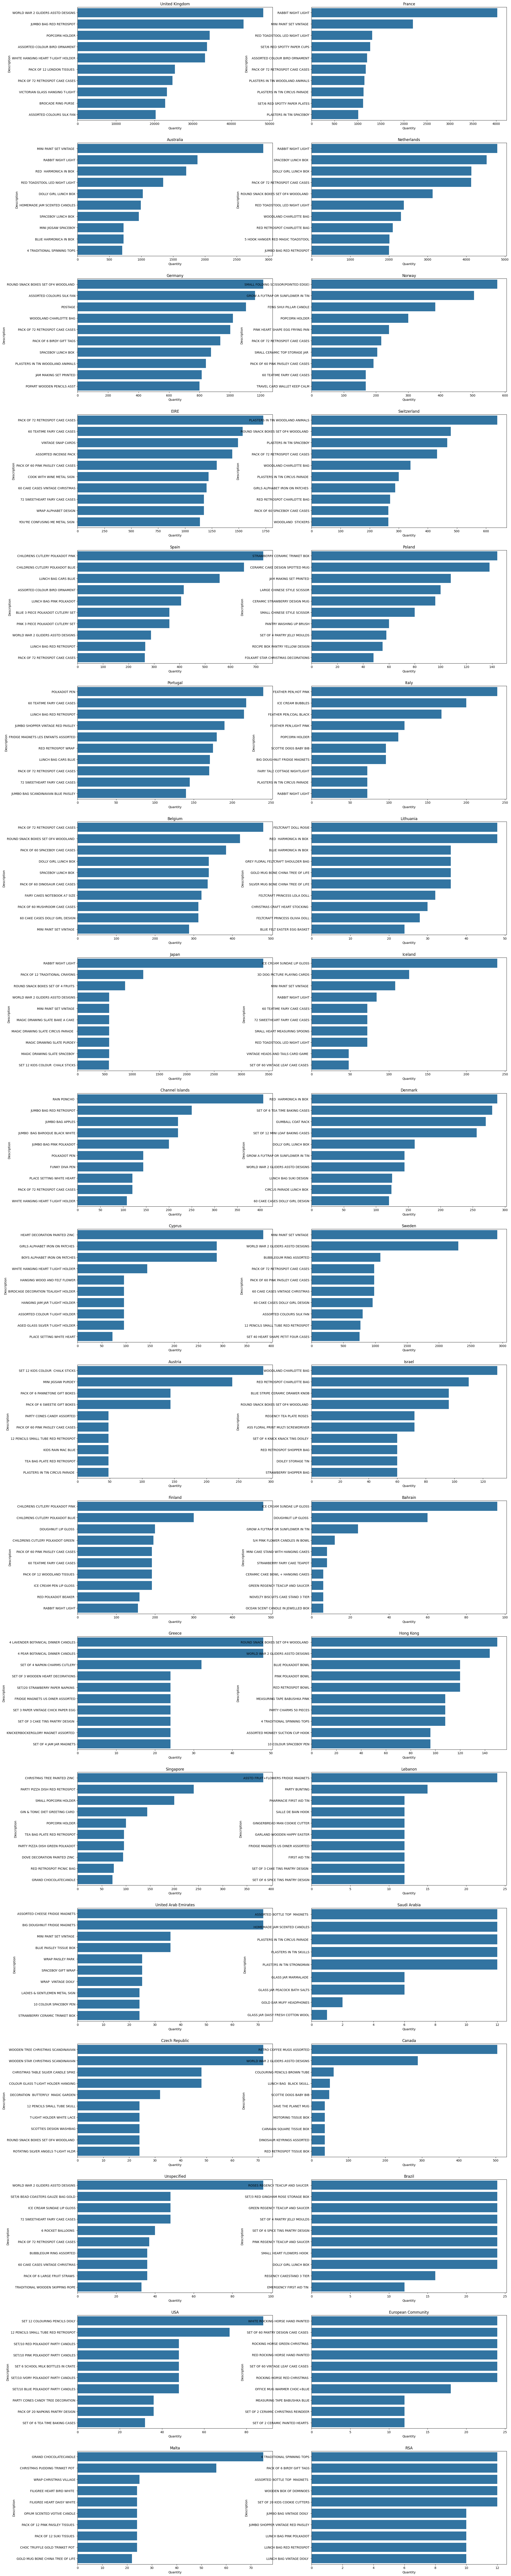

In [23]:
fig, axes=plt.subplots(nrows=19,ncols=2 ,figsize=(25,150))
Top_Products_Countrywise=pd.DataFrame(columns=['country','Top_Product'])
for i,country in enumerate(countries):
    row=i//2
    col=i%2
    temp_df=top_products_countrywise[top_products_countrywise['Country']==country].sort_values(by='Quantity',ascending=False).head(10)
    Top_Products_Countrywise=pd.concat([Top_Products_Countrywise, pd.DataFrame({'country': [country], 'Top_Product': [temp_df.head(1)['Description'].values[0]]})], ignore_index=True)
    sns.barplot(temp_df,x='Quantity',y='Description',ax=axes[row,col])
    axes[row,col].set_title(country)
    

In [24]:
Top_Products_Countrywise

country                          Top_Product
0         United Kingdom    WORLD WAR 2 GLIDERS ASSTD DESIGNS
1                 France                   RABBIT NIGHT LIGHT
2              Australia              MINI PAINT SET VINTAGE 
3            Netherlands                   RABBIT NIGHT LIGHT
4                Germany  ROUND SNACK BOXES SET OF4 WOODLAND 
5                 Norway  SMALL FOLDING SCISSOR(POINTED EDGE)
6                   EIRE      PACK OF 72 RETROSPOT CAKE CASES
7            Switzerland     PLASTERS IN TIN WOODLAND ANIMALS
8                  Spain      CHILDRENS CUTLERY POLKADOT PINK
9                 Poland       STRAWBERRY CERAMIC TRINKET BOX
10              Portugal                         POLKADOT PEN
11                 Italy                 FEATHER PEN,HOT PINK
12               Belgium      PACK OF 72 RETROSPOT CAKE CASES
13             Lithuania                 FELTCRAFT DOLL ROSIE
14                 Japan                   RABBIT NIGHT LIGHT
15               Iceland           ICE CREAM SUNDAE LIP GLOSS
16       Channel Islands                         RAIN PONCHO 
17               Denmark               RED  HARMONICA IN BOX 
18                Cyprus       HEART DECORATION PAINTED ZINC 
19                Sweden              MINI PAINT SET VINTAGE 
20               Austria     SET 12 KIDS COLOUR  CHALK STICKS
21                Israel               WOODLAND CHARLOTTE BAG
22               Finland      CHILDRENS CUTLERY POLKADOT PINK
23               Bahrain           ICE CREAM SUNDAE LIP GLOSS
24                Greece  4 LAVENDER BOTANICAL DINNER CANDLES
25             Hong Kong  ROUND SNACK BOXES SET OF4 WOODLAND 
26             Singapore         CHRISTMAS TREE PAINTED ZINC 
27               Lebanon   ASSTD FRUIT+FLOWERS FRIDGE MAGNETS
28  United Arab Emirates       ASSORTED CHEESE FRIDGE MAGNETS
29          Saudi Arabia        ASSORTED BOTTLE TOP  MAGNETS 
30        Czech Republic   WOODEN TREE CHRISTMAS SCANDINAVIAN
31                Canada           RETRO COFFEE MUGS ASSORTED
32           Unspecified    WORLD WAR 2 GLIDERS ASSTD DESIGNS
33                Brazil     ROSES REGENCY TEACUP AND SAUCER 
34                   USA       SET 12 COLOURING PENCILS DOILY
35    European Community     WHITE ROCKING HORSE HAND PAINTED
36                 Malta                GRAND CHOCOLATECANDLE
37                   RSA          4 TRADITIONAL SPINNING TOPS

## Top Products Year Wise

In [25]:
from datetime import datetime

In [26]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Invoice_year']=df['InvoiceDate'].dt.year
df['Invoice_month']=df['InvoiceDate'].dt.month
df['Invoice_hour']=df['InvoiceDate'].dt.hour

In [27]:
df.sample(7)

InvoiceNo StockCode                          Description  Quantity  \
176032    551995     21385      IVORY HANGING DECORATION  HEART         1   
265414    560225    90127A          PINK BEADS+HAND PHONE CHARM         2   
262031    559896     22746        POPPY'S PLAYHOUSE LIVINGROOM          2   
27039     538524     22530      MAGIC DRAWING SLATE DOLLY GIRL          1   
207371    554986     22562               MONSTERS STENCIL CRAFT         2   
532987    581003     84347  ROTATING SILVER ANGELS T-LIGHT HLDR        24   
456648    575705     22141       CHRISTMAS CRAFT TREE TOP ANGEL        24   

               InvoiceDate  UnitPrice  CustomerID         Country  \
176032 2011-05-05 15:42:00       1.63         NaN  United Kingdom   
265414 2011-07-15 16:27:00       2.46         NaN  United Kingdom   
262031 2011-07-13 12:15:00       2.10     15530.0  United Kingdom   
27039  2010-12-13 09:35:00       0.85         NaN  United Kingdom   
207371 2011-05-29 12:35:00       1.25     14451.0  United Kingdom   
532987 2011-12-07 08:38:00       2.55     14911.0            EIRE   
456648 2011-11-10 17:06:00       2.10     15159.0  United Kingdom   

        Invoice_year  Invoice_month  Invoice_hour  
176032          2011              5            15  
265414          2011              7            16  
262031          2011              7            12  
27039           2010             12             9  
207371          2011              5            12  
532987          2011             12             8  
456648          2011             11            17

In [28]:
df['Invoice_year'].unique()

array([2010, 2011])

In [29]:
year_2010_df=df[df['Invoice_year']==2010]
year_2010_df=year_2010_df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity',ascending=False)
year_2010_df

Description  Quantity
2710    WORLD WAR 2 GLIDERS ASSTD DESIGNS      5195
1677      PACK OF 72 RETROSPOT CAKE CASES      4076
1166          HAND WARMER BABUSHKA DESIGN      3382
2649   WHITE HANGING HEART T-LIGHT HOLDER      3343
2386                 SMALL POPCORN HOLDER      2731
...                                   ...       ...
2758                              damages       -43
2757                                check       -55
485             CARD HOLDER GINGHAM HEART       -99
810                          Dotcom sales      -200
2112  ROTATING SILVER ANGELS T-LIGHT HLDR     -7025

[2760 rows x 2 columns]

In [30]:
year_2011_df=df[df['Invoice_year']==2011]
year_2011_df=year_2011_df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity',ascending=False)
year_2011_df

Description  Quantity
3906   WORLD WAR 2 GLIDERS ASSTD DESIGNS     48652
1807             JUMBO BAG RED RETROSPOT     45237
2662                      POPCORN HOLDER     36334
239        ASSORTED COLOUR BIRD ORNAMENT     34010
3816  WHITE HANGING HEART T-LIGHT HOLDER     31974
...                                  ...       ...
1087                             Damaged     -7540
2715        Printing smudges/thrown away     -9058
4009                               check    -11975
3646              Unsaleable, destroyed.    -15644
4059        printing smudges/thrown away    -19200

[4115 rows x 2 columns]

Text(0.5, 1.0, 'YEAR 2011')

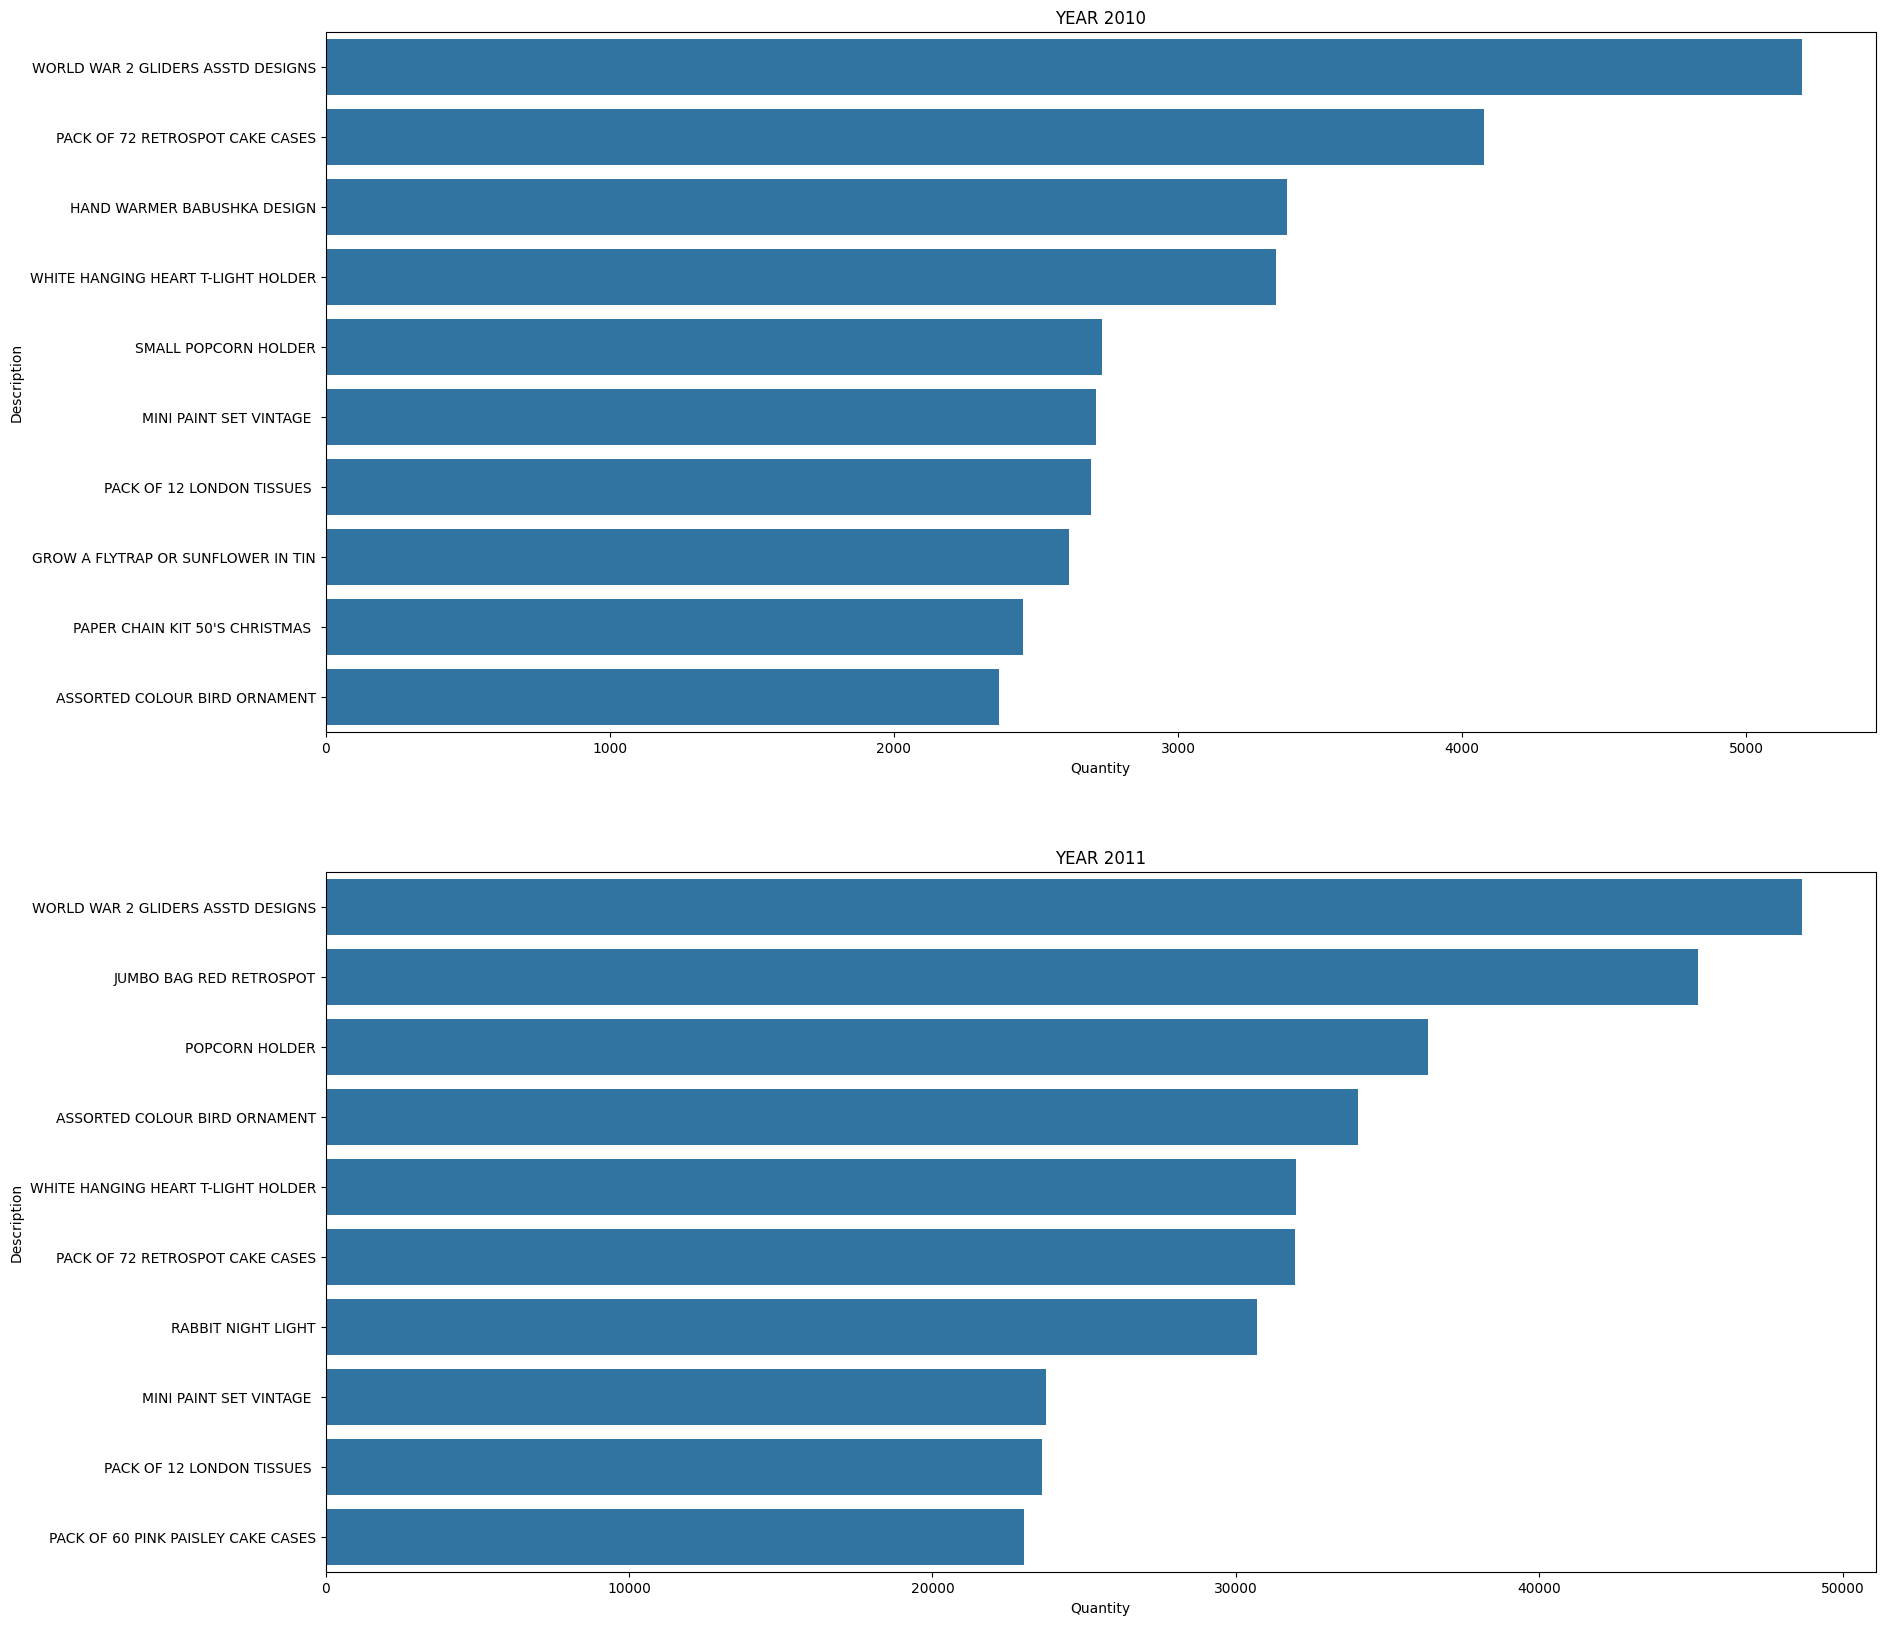

In [31]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.barplot(year_2010_df.head(10),x='Quantity',y='Description',ax=axes[0])
axes[0].set_title('YEAR 2010')
sns.barplot(year_2011_df.head(10),x='Quantity',y='Description',ax=axes[1])
axes[1].set_title('YEAR 2011')

## Top Products Month Wise

In [32]:
top_products_monthwise=df.groupby(by=['Invoice_month','Description']).agg({'Quantity':'sum'}).reset_index()
top_products_monthwise

Invoice_month                       Description  Quantity
0                  1     4 PURPLE FLOCK DINNER CANDLES         2
1                  1        OVAL WALL MIRROR DIAMANTE         23
2                  1   SET 2 TEA TOWELS I LOVE LONDON        430
3                  1            10 COLOUR SPACEBOY PEN       236
4                  1        12 COLOURED PARTY BALLOONS        80
...              ...                               ...       ...
32449             12                           missing      -338
32450             12                          mixed up      -424
32451             12                           smashed      -235
32452             12                               wet       -48
32453             12                         wet boxes      -288

[32454 rows x 3 columns]

In [33]:
top_products_monthwise[top_products_monthwise['Invoice_month']==1].sort_values(by='Quantity',ascending=False).head(10)

Invoice_month                         Description  Quantity
2450              1  WHITE HANGING HEART T-LIGHT HOLDER      5530
1532              1     PACK OF 72 RETROSPOT CAKE CASES      3409
789               1  FAIRY CAKE FLANNEL ASSORTED COLOUR      3246
372               1                 BROCADE RING PURSE       3181
1100              1               HEART OF WICKER SMALL      2919
1186              1             JUMBO BAG RED RETROSPOT      2639
946               1         GIN + TONIC DIET METAL SIGN      2410
509               1       CHINESE DRAGON PAPER LANTERNS      2128
1380              1             MINI PAINT SET VINTAGE       1913
2195              1                SMALL POPCORN HOLDER      1809

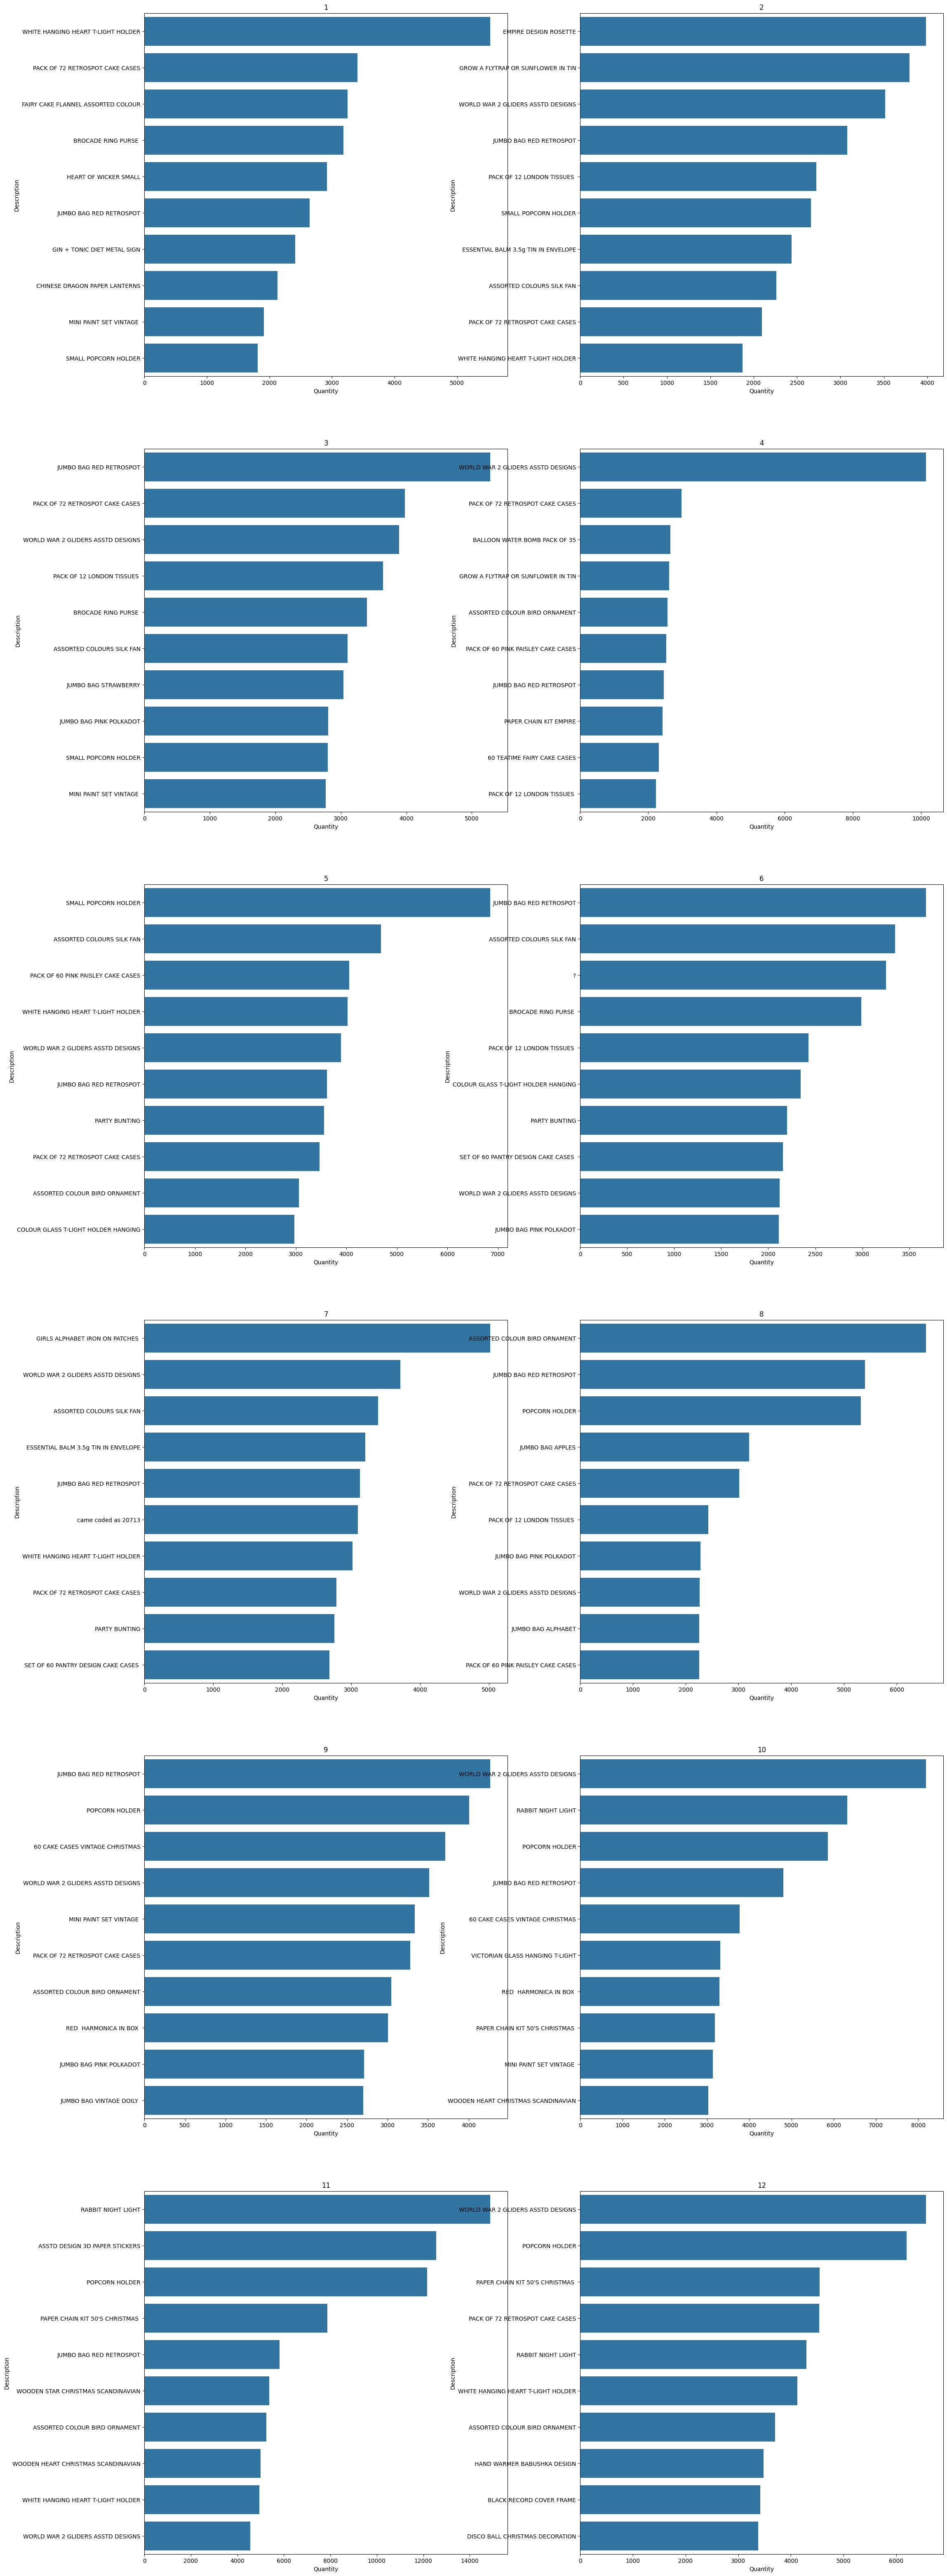

In [34]:
fig,axes=plt.subplots(nrows=6,ncols=2,figsize=(25,80))
for i in range(0,12):
    row=i//2
    col=i%2
    temp_df=top_products_monthwise[top_products_monthwise['Invoice_month']==i+1].sort_values(by='Quantity',ascending=False).head(10)
    sns.barplot(temp_df,x='Quantity',y='Description',ax=axes[row,col])
    axes[row,col].set_title(i+1)

## Month Wise Sale Analysis

In [35]:
df.groupby(by=['Invoice_month']).agg({'Quantity':'sum'}).reset_index()

Invoice_month  Quantity
0               1    308966
1               2    277989
2               3    351872
3               4    289098
4               5    380391
5               6    341623
6               7    391116
7               8    406199
8               9    549817
9              10    570532
10             11    740286
11             12    568561

In [36]:
fig=px.line(df.groupby(by=['Invoice_month']).agg({'Quantity':'sum'}).reset_index(),x='Invoice_month',y='Quantity',title='Monthwise sales')
fig.show()

#### Most of the sales were in the month of november 

## Hour Wise Sales 

In [37]:
df.groupby(by='Invoice_hour').agg({'Quantity':'sum'}).reset_index()
fig=px.bar(df.groupby(by='Invoice_hour').agg({'Quantity':'sum'}).reset_index(),x='Invoice_hour',y='Quantity',title='Hour wise sale')
fig.show()

#### The graph shows that the busiest time is between 10 and 15 (3 PM).

## Most Frequent Customers Analysis

In [38]:
Most_freq_cust=pd.DataFrame(df['CustomerID'].value_counts().head(10)).reset_index()
Most_freq_cust

CustomerID  count
0     17841.0   7983
1     14911.0   5903
2     14096.0   5128
3     12748.0   4642
4     14606.0   2782
5     15311.0   2491
6     14646.0   2085
7     13089.0   1857
8     13263.0   1677
9     14298.0   1640

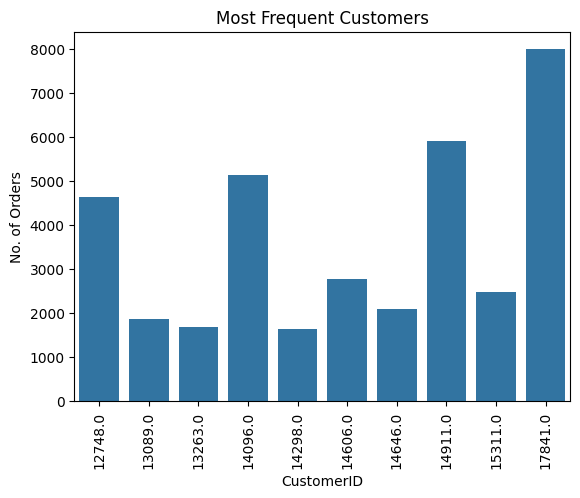

In [39]:
sns.barplot(Most_freq_cust,x='CustomerID',y='count')
plt.tick_params(axis='x',rotation=90)
plt.title('Most Frequent Customers')
plt.ylabel('No. of Orders')
plt.show()

In [7]:
df['Total_amount_paid']=df['Quantity']*df['UnitPrice']

In [41]:
top_customers=df[df['CustomerID'].isin(Most_freq_cust['CustomerID'])][['CustomerID','Country','Description','Quantity','Total_amount_paid']]
top_customers

CustomerID         Country                         Description  \
106        15311.0  United Kingdom    RETROSPOT TEA SET CERAMIC 11 PC    
107        15311.0  United Kingdom                 GIRLY PINK TOOL SET   
108        15311.0  United Kingdom   JUMBO SHOPPER VINTAGE RED PAISLEY   
109        15311.0  United Kingdom           AIRLINE LOUNGE,METAL SIGN   
110        15311.0  United Kingdom  WHITE SPOT RED CERAMIC DRAWER KNOB   
...            ...             ...                                 ...   
541855     12748.0  United Kingdom            CINAMMON & ORANGE WREATH   
541856     12748.0  United Kingdom      PINK REGENCY TEACUP AND SAUCER   
541857     12748.0  United Kingdom             20 DOLLY PEGS RETROSPOT   
541858     12748.0  United Kingdom                       CHILLI LIGHTS   
541859     12748.0  United Kingdom         TEA TIME TEAPOT IN GIFT BOX   

        Quantity  Total_amount_paid  
106           23              97.75  
107            5              24.75  
108           10              19.50  
109            2               4.20  
110            6               7.50  
...          ...                ...  
541855         1               6.75  
541856         1               2.95  
541857         1               1.45  
541858         2              11.50  
541859         1               4.95  

[36188 rows x 5 columns]

In [42]:
top_customers[['CustomerID','Country']].drop_duplicates()

CustomerID         Country
106        15311.0  United Kingdom
1016       12748.0  United Kingdom
1404       14911.0            EIRE
1441       17841.0  United Kingdom
2421       14606.0  United Kingdom
7440       13089.0  United Kingdom
29815      14298.0  United Kingdom
37952      14646.0     Netherlands
62628      13263.0  United Kingdom
317502     14096.0  United Kingdom

#### Most of the Frequent Customers are from United Kingdom

In [43]:
customer_Total_payments=df.groupby(by='CustomerID').agg({'Total_amount_paid':'sum'}).reset_index().sort_values(by='Total_amount_paid',ascending=False)
customer_Total_payments

CustomerID  Total_amount_paid
1703     14646.0          279489.02
4233     18102.0          256438.49
3758     17450.0          187482.17
1895     14911.0          132572.62
55       12415.0          123725.45
...          ...                ...
125      12503.0           -1126.00
3870     17603.0           -1165.30
1384     14213.0           -1192.20
2236     15369.0           -1592.49
3756     17448.0           -4287.63

[4372 rows x 2 columns]

These are the total amount paid by each customers. 

In [44]:
Top_customer_total_payment=pd.merge(df[df['CustomerID'].isin(customer_Total_payments.head(10)['CustomerID'])][['CustomerID','Country']].drop_duplicates()
,customer_Total_payments.head(10),how='inner').sort_values(by='Total_amount_paid',ascending=False)
Top_customer_total_payment

CustomerID         Country  Total_amount_paid
8     14646.0     Netherlands          279489.02
6     18102.0  United Kingdom          256438.49
5     17450.0  United Kingdom          187482.17
3     14911.0            EIRE          132572.62
9     12415.0       Australia          123725.45
4     14156.0            EIRE          113384.14
1     17511.0  United Kingdom           88125.38
7     16684.0  United Kingdom           65892.08
2     13694.0  United Kingdom           62653.10
0     15311.0  United Kingdom           59419.34

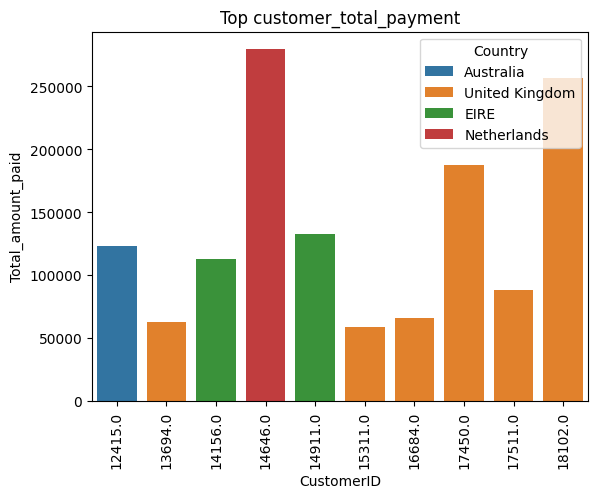

In [45]:
sns.barplot(Top_customer_total_payment,x='CustomerID',y='Total_amount_paid',hue='Country',dodge=False)
plt.tick_params(axis='x',rotation=90)
plt.title('Top customer_total_payment')
plt.show()

## Number of Customers From each Country

In [46]:
pd.DataFrame(df['Country'].value_counts()).reset_index()

Country   count
0         United Kingdom  495478
1                Germany    9495
2                 France    8557
3                   EIRE    8196
4                  Spain    2533
5            Netherlands    2371
6                Belgium    2069
7            Switzerland    2002
8               Portugal    1519
9              Australia    1259
10                Norway    1086
11                 Italy     803
12       Channel Islands     758
13               Finland     695
14                Cyprus     622
15                Sweden     462
16           Unspecified     446
17               Austria     401
18               Denmark     389
19                 Japan     358
20                Poland     341
21                Israel     297
22                   USA     291
23             Hong Kong     288
24             Singapore     229
25               Iceland     182
26                Canada     151
27                Greece     146
28                 Malta     127
29  United Arab Emirates      68
30    European Community      61
31                   RSA      58
32               Lebanon      45
33             Lithuania      35
34                Brazil      32
35        Czech Republic      30
36               Bahrain      19
37          Saudi Arabia      10

In [47]:
fig=px.bar(pd.DataFrame(df['Country'].value_counts()).reset_index(),y='Country',x='count')
fig.show()

In our Dataset Most of the Customers are from United kingdom 

## Total amound Paid Per Country

In [48]:
Total_amount_paid_per_country=df.groupby('Country').agg({'Total_amount_paid':'sum'}).reset_index()
Total_amount_paid_per_country

Country  Total_amount_paid
0              Australia         137077.270
1                Austria          10154.320
2                Bahrain            548.400
3                Belgium          40910.960
4                 Brazil           1143.600
5                 Canada           3666.380
6        Channel Islands          20086.290
7                 Cyprus          12946.290
8         Czech Republic            707.720
9                Denmark          18768.140
10                  EIRE         263276.820
11    European Community           1291.750
12               Finland          22326.740
13                France         197403.900
14               Germany         221698.210
15                Greece           4710.520
16             Hong Kong          10117.040
17               Iceland           4310.000
18                Israel           7907.820
19                 Italy          16890.510
20                 Japan          35340.620
21               Lebanon           1693.880
22             Lithuania           1661.060
23                 Malta           2505.470
24           Netherlands         284661.540
25                Norway          35163.460
26                Poland           7213.140
27              Portugal          29367.020
28                   RSA           1002.310
29          Saudi Arabia            131.170
30             Singapore           9120.390
31                 Spain          54774.580
32                Sweden          36595.910
33           Switzerland          56385.350
34                   USA           1730.920
35  United Arab Emirates           1902.280
36        United Kingdom        8187806.364
37           Unspecified           4749.790

In [49]:
fig=px.bar(Total_amount_paid_per_country,x='Country',y='Total_amount_paid',title='Total amount paid per country ')
fig.show()

In [44]:
pip install geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
country_sales = df.groupby('Country')['Total_amount_paid'].sum().reset_index()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_sales, how='left', left_on='name', right_on='Country')


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='Total_amount_paid', ax=ax, legend=True, cax=cax,legend_kwds={'label': "Total Amount Paid by Country"})
ax.set_title('Distribution of Sales Across Different Countries')
plt.show()

NameError: name 'df' is not defined